# Implementação Manual Gradiente Descendente

# Preliminares

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

In [58]:
!gdown 1HDYK7fiHo9Saq3fx028oEICSM2lB2MmV

Downloading...
From: https://drive.google.com/uc?id=1HDYK7fiHo9Saq3fx028oEICSM2lB2MmV
To: /content/DEMOGRAFIA_FORTALEZA.csv
100% 15.0k/15.0k [00:00<00:00, 29.2MB/s]


In [59]:
df = pd.read_csv('DEMOGRAFIA_FORTALEZA.csv',
                 sep=',')
df.head()

,Bairro,Bairro.1,Regional,Cidade,Latitude (generated),Longitude (generated),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Média de moradores por domicílio,Parâmetro,Pop. Homens,Pop. Mulheres,População (0-14 anos),População (15-64 anos),População (> 64 anos),Rótulos
0,Sapiranga/Coité,Sapiranga/Coité,REGIONAL 6,Fortaleza,-3.796719,-38.466146,25.58,69.81,4.61,3.73,32158,15278,16880,8226,22449,1483,NaN
1,São Bento,São Bento,REGIONAL 6,Fortaleza,-3.854319,-38.482456,28.05,68.16,3.79,3.36,11964,5771,6193,3356,8155,453,NaN
2,Sabiaguaba,Sabiaguaba,REGIONAL 6,Fortaleza,-3.802250,-38.426503,25.32,69.82,4.87,3.59,2117,1043,1074,536,1478,103,NaN
3,Pedras,Pedras,REGIONAL 6,Fortaleza,-3.875779,-38.511808,25.34,68.03,6.63,3.63,1342,670,672,340,913,89,NaN
4,Paupina,Paupina,REGIONAL 6,Fortaleza,-3.862069,-38.493183,24.66,70.64,4.70,3.46,14665,7042,7623,3616,10360,689,NaN


# Construção Inicial

In [299]:
np.random.seed(42)

In [324]:
float(w)

2.3023363674587276e+105

In [340]:
x = df['Pop. Homens'].copy()
y = df['Pop. Mulheres'].copy()

In [371]:
learning_rate = 0.000000001
n_iterations = 30

w = np.random.uniform(1,10,1000)[0]
b = np.random.uniform(1,10,1000)[0]

w_list = []
b_list = []
errors = []
iters = list(range(1,n_iterations+1))

n = len(df)



for _ in range(n_iterations):
    y_pred = np.array([(w*xi+b) for xi in x])

    dw = (-2/n) * np.sum((y - y_pred) * x)
    db = (-2/n) * np.sum(y - y_pred)

    w -= dw*learning_rate
    b -= db *learning_rate

    mse = ((y-y_pred)**2).mean()

    errors.append(mse)
    w_list.append(w)
    b_list.append(b)

f = np.poly1d([w,b])

print(f'Coeficiente Angular:{w}')
print(f'Coeficiente Linear: {b}')

Coeficiente Angular:1.12047730411321
Coeficiente Linear: 4.202388456214155


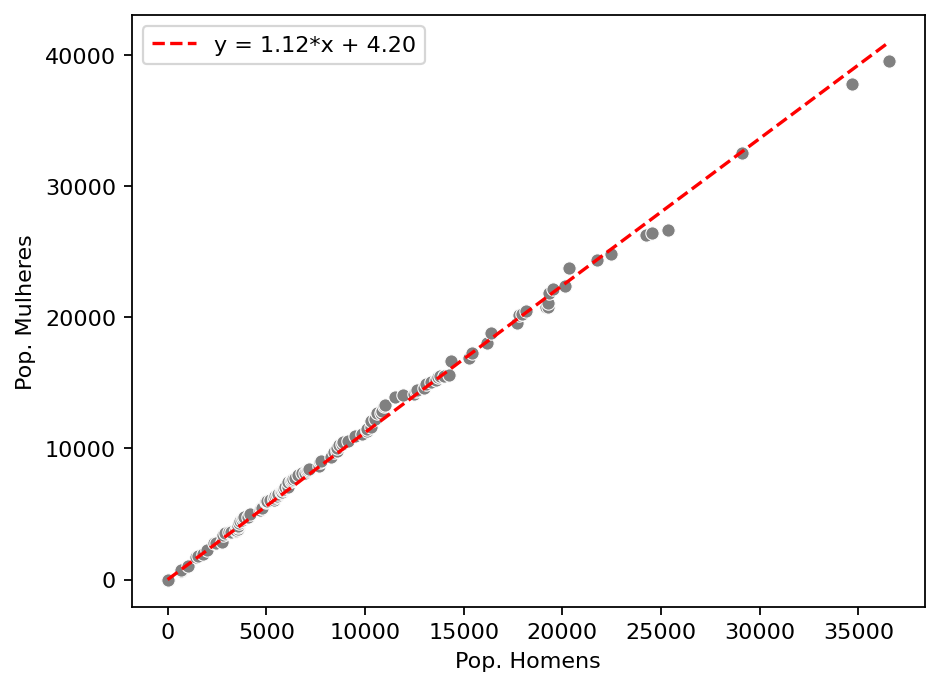

In [372]:
plt.figure(dpi=160)

sns.scatterplot(data=df,
                x='Pop. Homens',
                y='Pop. Mulheres',
                color='gray')

sns.lineplot(x = x,
             y = f(x),
             color='red',
             linestyle= 'dashed',
             label=f'y = {w:.2f}*x + {b:.2f}')

plt.legend()
plt.show()

# Análise dos resultados

## Criação do Dataframe Auxiliar

In [373]:
data = pd.DataFrame({'Iteração': iters,
                     'Slope':w_list,
                     'Bias':b_list,
                     'MSEs':errors})

data.set_index('Iteração',inplace=True)

data.head()

,Slope,Bias,MSEs
Iteração,,,
1,7.051648,4.202780,9.710138e+09
2,5.370509,4.202667,4.986078e+09
3,4.165844,4.202586,2.560358e+09
4,3.302609,4.202528,1.314795e+09
5,2.684035,4.202487,6.752201e+08


## Visualização

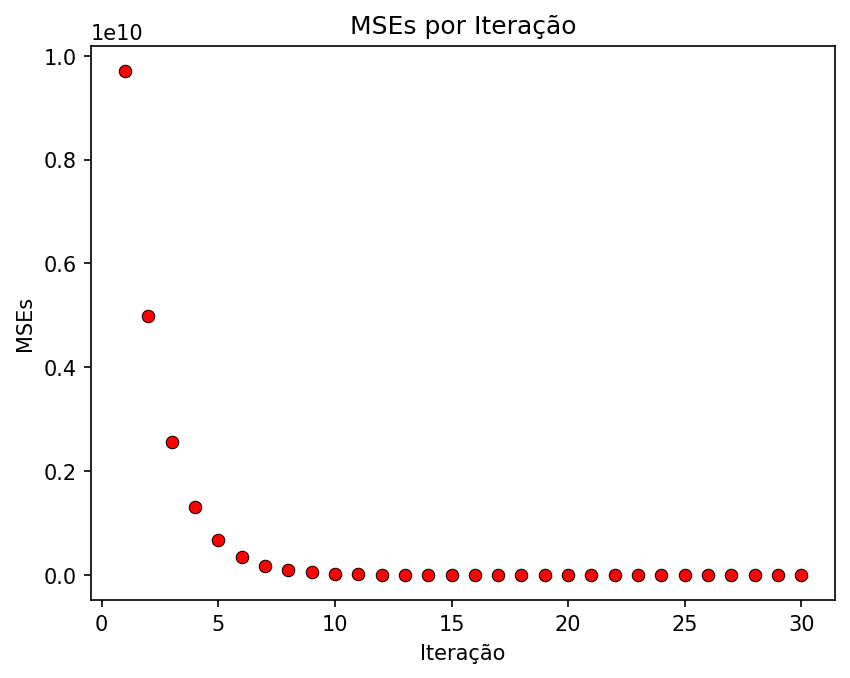

In [379]:
plt.figure(dpi=150)

sns.scatterplot(data=data,
                y='MSEs',
                x='Iteração',
                color='red',
                edgecolor='black')

plt.title('MSEs por Iteração')

plt.show()

# Análise das Variações

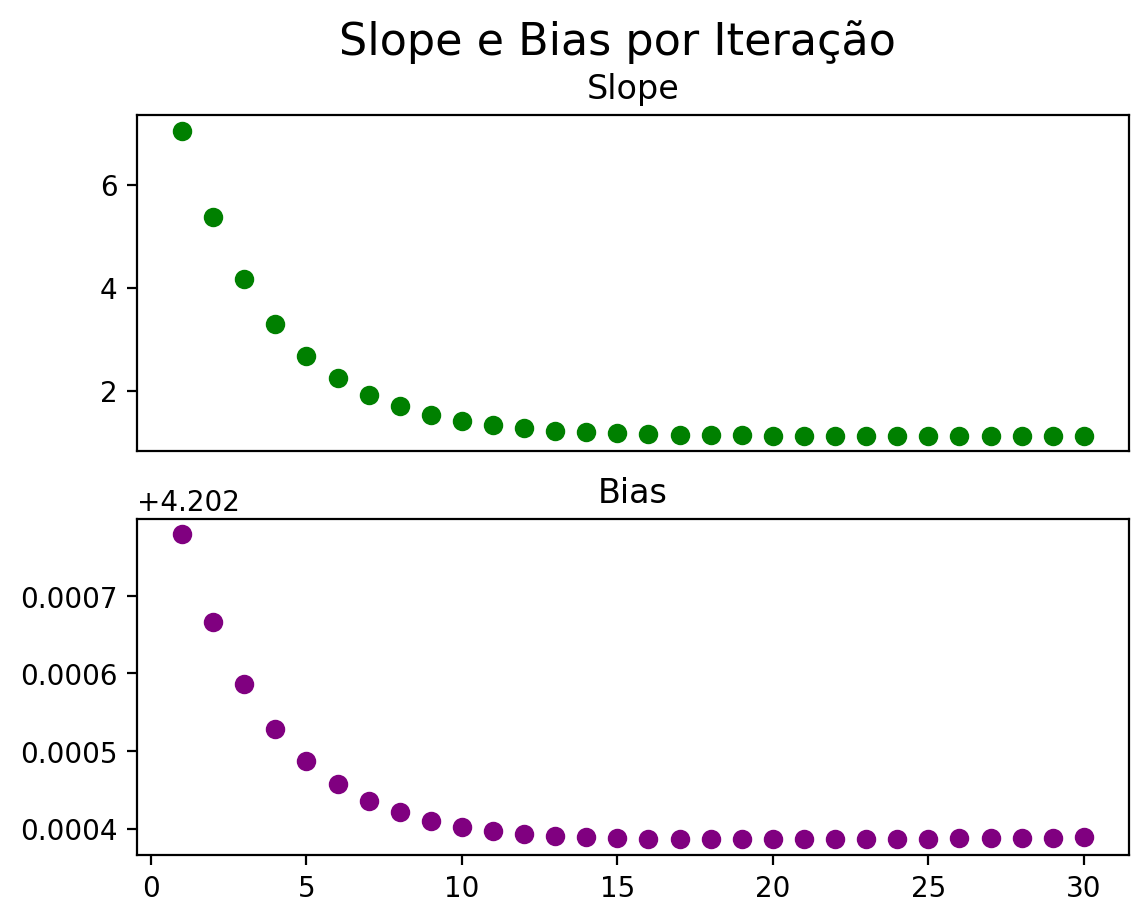

In [424]:
fig, axs = plt.subplots(2, 1, dpi=200,sharex=True)
fig.suptitle('Slope e Bias por Iteração', fontsize=16)
#Item 3

axs[0].scatter(x = data.index,
               y = data['Slope'],
               color='green')
axs[0].tick_params(axis='x', bottom=False)
axs[0].set_title('Slope')


axs[1].scatter(x = data.index,
               y = data['Bias'],
               color='purple')
axs[1].set_title('Bias')


plt.show()

## Visualizando tudo unificado



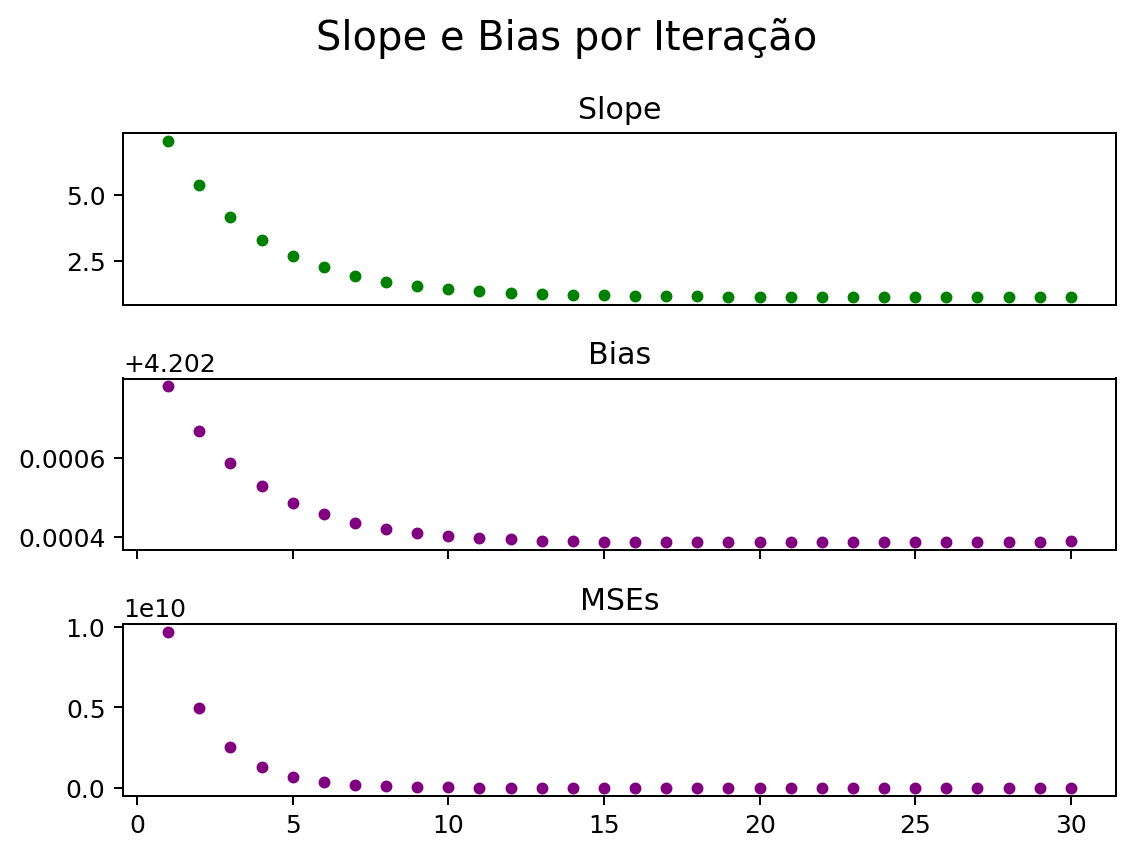

In [435]:
fig, axs = plt.subplots(3, 1, dpi=180,sharex=True)
fig.suptitle('Slope e Bias por Iteração', fontsize=16)
#Item 3

axs[0].scatter(x = data.index,
               y = data['Slope'],
               color='green',
               s = 14)
axs[0].tick_params(axis='x', bottom=False)
axs[0].set_title('Slope')


axs[1].scatter(x = data.index,
               y = data['Bias'],
               color='purple',
               s = 14)
axs[1].set_title('Bias')

axs[2].scatter(x = data.index,
               y = data['MSEs'],
               color='purple',
               s = 14 )
axs[2].set_title('MSEs')

plt.tight_layout()
plt.show()